<a href="https://colab.research.google.com/github/access-dinesh/DS_Python/blob/main/w2v_char.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import tensorflow as tf
import pandas as pd

In [8]:
headlines = pd.read_csv('/content/abcnews-date-text.csv')['headline_text']

In [9]:
headlines

0         aba decides against community broadcasting lic...
1            act fire witnesses must be aware of defamation
2            a g calls for infrastructure protection summit
3                  air nz staff in aust strike for pay rise
4             air nz strike to affect australian travellers
                                ...                        
170400                    vline under fire over late trains
170401        wadeye education funding shortfall questioned
170402               wallabies boost nts side to play samoa
170403        water management seen as crucial to saleyards
170404                             welfare group continues 
Name: headline_text, Length: 170405, dtype: object

In [10]:
headlines[0]

'aba decides against community broadcasting licence'

In [11]:
import itertools as it

def sliding_window(txt):
  for i in range(len(txt) - 1):
    yield txt[i], txt[i + 1]

window = list(it.chain(*[sliding_window(_) for _ in headlines[:10000]]))

In [12]:
mapping = {c: i for i, c in enumerate(pd.DataFrame(window)[0].unique())}
integers_in = np.array([mapping[w[0]] for w in window])
integers_out = np.array([mapping[w[1]] for w in window]).reshape(-1, 1)

In [13]:
integers_in.shape

(386880,)

In [14]:
from tensorflow.keras.layers import Embedding, Dense, Flatten
from tensorflow.keras.models import Sequential

num_letters = len(mapping) # typically 36 -> 26 letters + 10 numbers

# this one is so we might grab the embeddings
model_emb = Sequential()
embedding = Embedding(num_letters, 2, input_length=1)
model_emb.add(embedding)
output_array = model_emb.predict(integers_in)
output_array.shape

12090/12090 [==============================] - 16s 1ms/step


(386880, 1, 2)

2/2 [==============================] - 0s 6ms/step


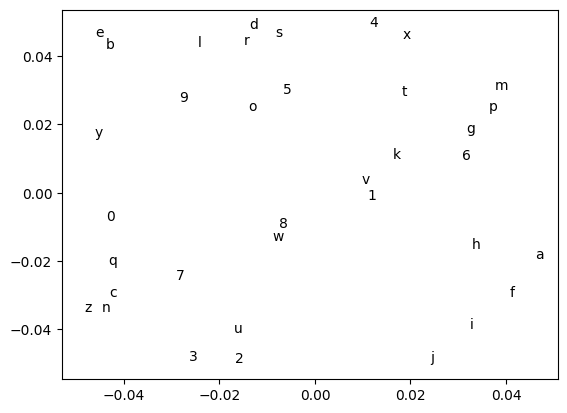

In [15]:
import matplotlib.pylab as plt

idx_to_calc = list(mapping.values())
idx_to_calc = np.array([idx_to_calc]).T

translator = {v:k for k,v in mapping.items()}
preds = model_emb.predict(idx_to_calc)

plt.scatter(preds[:, 0, 0], preds[:, 0, 1], alpha=0)
for i, idx in enumerate(idx_to_calc):
  plt.text(preds[i, 0, 0], preds[i, 0, 1], translator[idx[0]])

In [16]:
from tensorflow.keras.optimizers import Adam

# this one is so we might learn the mapping
model_pred = Sequential()
model_pred.add(embedding)
model_pred.add(Flatten())
model_pred.add(Dense(num_letters, activation="softmax"))

adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

model_pred.compile(adam, 'categorical_crossentropy', metrics=['accuracy'])

output_array = model_pred.predict(integers_in)
output_array.shape

12090/12090 [==============================] - 29s 2ms/step


(386880, 37)

In [17]:
from sklearn.preprocessing import OneHotEncoder

to_predict = OneHotEncoder(sparse=False).fit_transform(integers_out)
model_pred.fit(integers_in, to_predict, epochs=30, verbose=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
12090/12090 [==============================] - 25s 2ms/step - loss: 2.7553 - accuracy: 0.1792
Epoch 2/30
12090/12090 [==============================] - 22s 2ms/step - loss: 2.6753 - accuracy: 0.1947
Epoch 3/30
12090/12090 [==============================] - 22s 2ms/step - loss: 2.6697 - accuracy: 0.1965
Epoch 4/30
12090/12090 [==============================] - 22s 2ms/step - loss: 2.6682 - accuracy: 0.1967
Epoch 5/30
12090/12090 [==============================] - 23s 2ms/step - loss: 2.6672 - accuracy: 0.1962
Epoch 6/30
12090/12090 [==============================] - 21s 2ms/step - loss: 2.6666 - accuracy: 0.1962
Epoch 7/30
12090/12090 [==============================] - 23s 2ms/step - loss: 2.6663 - accuracy: 0.1961
Epoch 8/30
12090/12090 [==============================] - 22s 2ms/step - loss: 2.6658 - accuracy: 0.1963
Epoch 9/30
12090/12090 [==============================] - 23s 2ms/step - loss: 2.6654 - accuracy: 0.1963
Epoch 10/30
12090/12090 [==============================

2/2 [==============================] - 0s 5ms/step


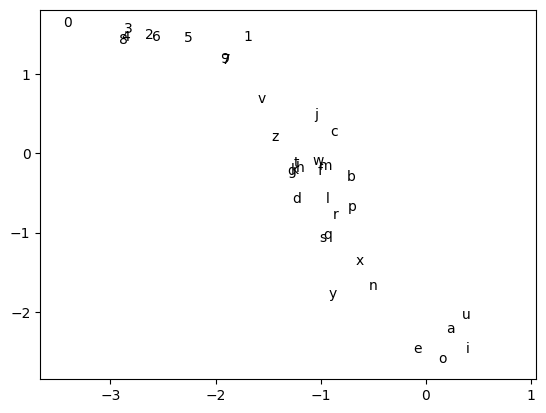

In [18]:
preds = model_emb.predict(idx_to_calc)
plt.scatter(preds[:, 0, 0], preds[:, 0, 1], alpha=0)
for i, idx in enumerate(idx_to_calc):
  plt.text(preds[i, 0, 0], preds[i, 0, 1], translator[idx[0]])